In [5]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import face_recognition
import numpy as np
import sys

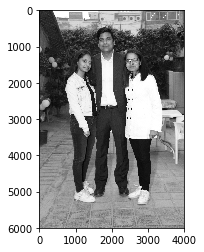

In [12]:
#your image
test_image = cv2.imread('data/images/3.JPG')

#Converting to grayscale
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale image
plt.imshow(test_image_gray, cmap='gray')

In [13]:
haar_cascade_face = cv2.CascadeClassifier('data/haarcascades/haarcascade_frontalface_default.xml')

faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.3, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

Faces found:  3


Saving locally.
Saving locally.
Saving locally.


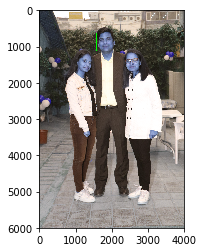

In [22]:
faces = 1
for (x,y,w,h) in faces_rects:
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_color = test_image[y:y + h, x:x + w]
    print("Saving locally.")
    cv2.imwrite('data/CropFace/' + str(faces) + '_face.jpg', roi_color)
    faces+=1


#convert image to RGB and show image
plt.imshow(test_image)

In [6]:
images = r'data/images'

for filename in os.listdir(images):
    
    image = cv2.imread(os.path.join(images, filename))
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    haar_cascade_face = cv2.CascadeClassifier('data/haarcascades/haarcascade_frontalface_default.xml')
    faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.3, minNeighbors = 5);
    
    #print('Faces found: ', len(faces_rects))
    
    faces = 1
    for (x,y,w,h) in faces_rects:
        cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        roi_color = test_image[y:y + h, x:x + w]
        cv2.imwrite('data/CropFace/' + str(faces) + '_face.jpg', roi_color)
        faces+=1    


Faces found:  3


NameError: name 'convertToRGB' is not defined

In [25]:
picture_of_me = face_recognition.load_image_file("data/images/khyati.jpg")
my_face_encoding = face_recognition.face_encodings(picture_of_me)[0]

# my_face_encoding now contains a universal 'encoding' of my facial features that can be compared to any other picture of a face!

unknown_picture = face_recognition.load_image_file("data/CropFace/3_face.jpg")
unknown_face_encoding = face_recognition.face_encodings(unknown_picture)[0]

# Now we can see the two face encodings are of the same person with `compare_faces`!

results = face_recognition.compare_faces([my_face_encoding], unknown_face_encoding)

if results[0] == True:
    print("It's a picture of me!")
else:
    print("It's not a picture of me!")

It's not a picture of me!
